## Exploratory Data Analysis (EDA)

In [5]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

#Load the dataset
df = pd.read_csv("/Users/zijinpeng/Desktop/preprocessed_Data.csv")

#Basic overview of the dataset
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

#Check for missing values and duplicates
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

#Category distribution
print("\nCategory Distribution:")
print(df['Category'].value_counts())

First 5 rows:
      Category                                               Text
0  Accountant  education omba executive leadership university...
1  Accountant  howard gerrard accountant deyjobcom birmingham...
2  Accountant  kevin frank senior accountant inforesumekraftc...
3  Accountant  place birth nationality olivia ogilvy accounta...
4  Accountant  stephen greet cpa senior accountant 9 year exp...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  13389 non-null  object
 1   Text      13389 non-null  object
dtypes: object(2)
memory usage: 209.3+ KB
None

Summary Statistics:
         Category                                               Text
count       13389                                              13389
unique         43                                              12085
top     Education  justin baumgarter 5555 app

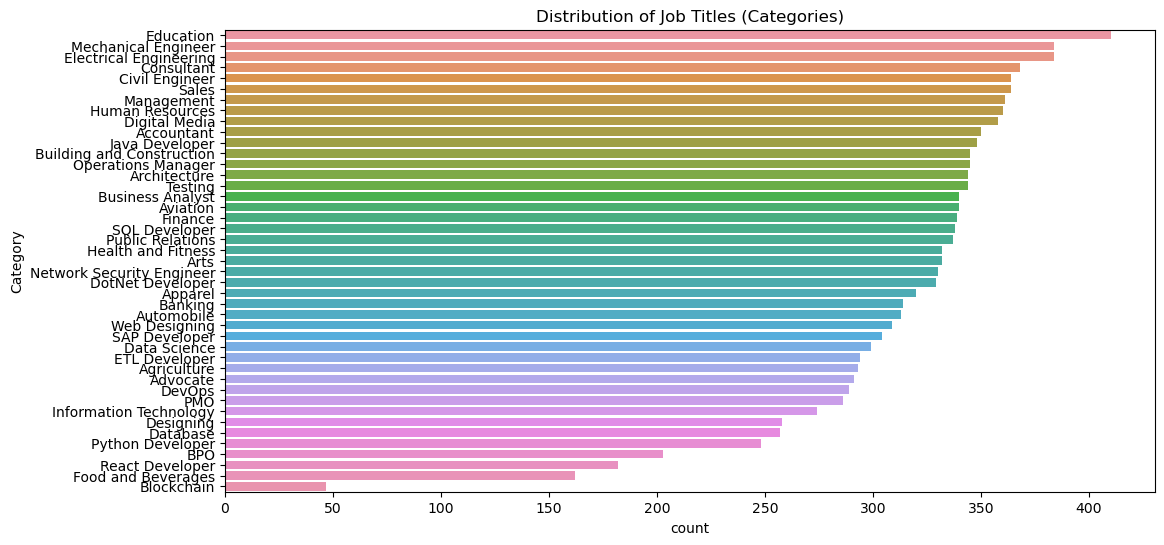

In [7]:
# Visualize the category distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Job Titles (Categories)')
plt.show()


In [11]:
# Analyze Common Words by Category
from nltk.corpus import stopwords

# Step 1: Set up stopwords
stop_words = set(stopwords.words('english'))

# Step 2: Group data by category and join all text for each category
category_texts = df.groupby('Category')['Text'].apply(lambda texts: ' '.join(texts)).reset_index()

# Step 3: Define a function to get the most common words for a category (excluding stopwords)
def get_top_words(text, n=10):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    common_words = Counter(words).most_common(n)
    return common_words

# Step 4: Apply the function to each category and display top 10 words
for _, row in category_texts.iterrows():
    category = row['Category']
    text = row['Text']
    top_words = get_top_words(text, n=10)
    print(f"\nTop 10 Words for Category: {category}")
    for word, freq in top_words:
        print(f"{word}: {freq}")


Top 10 Words for Category: Accountant
financial: 2313
accounting: 2287
accounts: 1334
management: 1058
tax: 1018
accountant: 976
reports: 848
business: 810
skills: 742
monthly: 703

Top 10 Words for Category: Advocate
customer: 1426
service: 928
skills: 857
advocate: 610
management: 594
customers: 594
services: 584
experience: 551
clients: 548
work: 538

Top 10 Words for Category: Agriculture
equipment: 929
agricultural: 715
work: 711
management: 611
skills: 600
experience: 590
customer: 505
team: 502
state: 492
farm: 468

Top 10 Words for Category: Apparel
customer: 1834
sales: 1658
customers: 1397
service: 997
store: 946
merchandise: 899
skills: 870
team: 860
product: 828
new: 828

Top 10 Words for Category: Architecture
design: 1694
project: 1346
management: 1139
architecture: 1029
projects: 910
team: 851
development: 835
architect: 775
business: 766
skills: 763

Top 10 Words for Category: Arts
students: 1750
arts: 1258
school: 1077
student: 912
skills: 910
learning: 893
education:

##  Prepare Features for BERT

In [14]:
# Load libraries and dataset
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

# Load the dataset
df = pd.read_csv("/Users/zijinpeng/Desktop/preprocessed_Data.csv")

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [15]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

example_text = df['Text'][0]
tokens = tokenizer.tokenize(example_text)
print(tokens)  # View tokenized text

# Convert tokens to IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(token_ids)  # View token IDs


['education', 'om', '##ba', 'executive', 'leadership', 'university', 'texas', '2016', '##20', '##18', 'bachelor', 'science', 'accounting', 'rich', '##land', 'college', '2005', '##200', '##8', 'training', 'certification', '##s', 'certified', 'management', 'accountant', 'cm', '##a', 'certified', 'financial', 'modeling', 'valuation', 'analyst', 'compliance', 'anti', '##mon', '##ey', 'laundering', '09', '##20', '##16', 'american', 'institute', 'banking', 'certified', 'public', 'account', 'cp', '##a', 'lean', 'six', 'sigma', 'green', 'belt', 'certified', 'trade', 'products', 'financial', 'regulations', '08', '##20', '##16', 'american', 'institute', 'banking', 'achievements', 'speaker', 'bringing', 'leader', 'within', '08', '##20', '##19', 'successfully', 'presented', 'em', '##powering', 'speech', 'leadership', '500', 'participants', 'speaker', 'dallas', 'convention', 'cp', '##as', '03', '##20', '##19', 'successfully', 'delivered', 'seminar', '3', '##k', 'cp', '##as', 'convention', 'guests',

In [17]:
#Tokenize All Text Data for BERT
# Define a function to tokenize and encode text
def encode_data(texts, tokenizer, max_len=512):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,  # Add [CLS] and [SEP]
            max_length=max_len,  # Max length of input
            truncation=True,  # Truncate longer texts
            padding='max_length',  # Pad to max length
            return_attention_mask=True,  # Create attention masks
            return_tensors='pt'  # Return PyTorch tensors
        )

        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# Apply the encoding function to the dataset
input_ids, attention_masks = encode_data(df['Text'].tolist(), tokenizer)

print(f"Input IDs shape: {input_ids.shape}")
print(f"Attention Masks shape: {attention_masks.shape}")


Input IDs shape: torch.Size([13389, 512])
Attention Masks shape: torch.Size([13389, 512])


In [20]:
#Convert Categories to Numerical Labels
#Since BERT works with numerical labels,we need to convert job categories into integers.
from sklearn.preprocessing import LabelEncoder

# Encode the job categories
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Category'])

print(f"Encoded Labels: {labels[:10]}")
print(f"Label Mapping: {dict(enumerate(label_encoder.classes_))}")


Encoded Labels: [0 0 0 0 0 0 0 0 0 0]
Label Mapping: {0: 'Accountant', 1: 'Advocate', 2: 'Agriculture', 3: 'Apparel', 4: 'Architecture', 5: 'Arts', 6: 'Automobile', 7: 'Aviation', 8: 'BPO', 9: 'Banking', 10: 'Blockchain', 11: 'Building and Construction', 12: 'Business Analyst', 13: 'Civil Engineer', 14: 'Consultant', 15: 'Data Science', 16: 'Database', 17: 'Designing', 18: 'DevOps', 19: 'Digital Media', 20: 'DotNet Developer', 21: 'ETL Developer', 22: 'Education', 23: 'Electrical Engineering', 24: 'Finance', 25: 'Food and Beverages', 26: 'Health and Fitness', 27: 'Human Resources', 28: 'Information Technology', 29: 'Java Developer', 30: 'Management', 31: 'Mechanical Engineer', 32: 'Network Security Engineer', 33: 'Operations Manager', 34: 'PMO', 35: 'Public Relations', 36: 'Python Developer', 37: 'React Developer', 38: 'SAP Developer', 39: 'SQL Developer', 40: 'Sales', 41: 'Testing', 42: 'Web Designing'}


In [22]:
#Create a PyTorch Dataset and DataLoader

#prepare the data using PyTorch's DataLoader for easy batching during model training.

from torch.utils.data import DataLoader, TensorDataset, random_split

# Create a TensorDataset
dataset = TensorDataset(input_ids, attention_masks, torch.tensor(labels))

# Split into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 8  # can be adjusted

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


In [ ]:

# BERT Model Training Setup

import torch
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score

# Step 1: Initialize BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 2: Define Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Step 3: Define Training Loop
def train(model, dataloader, optimizer, scheduler):
    model.train()
    total_loss = 0
    for batch in dataloader:
        b_input_ids, b_attention_mask, b_labels = tuple(t.to(device) for t in batch)
        model.zero_grad()

        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    
    return total_loss / len(dataloader)

# Step 4: Define Evaluation Loop
def evaluate(model, dataloader):
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    for batch in dataloader:
        b_input_ids, b_attention_mask, b_labels = tuple(t.to(device) for t in batch)
        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
        loss = outputs.loss
        logits = outputs.logits
        eval_loss += loss.item()
        
        preds = torch.argmax(logits, dim=1).flatten()
        eval_accuracy += accuracy_score(b_labels.cpu().numpy(), preds.cpu().numpy())
    
    return eval_loss / len(dataloader), eval_accuracy / len(dataloader)

# Step 5: Training Loop Across Epochs
for epoch in range(epochs):
    avg_train_loss = train(model, train_dataloader, optimizer, scheduler)
    avg_val_loss, avg_val_accuracy = evaluate(model, val_dataloader)
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training loss: {avg_train_loss}")
    print(f"Validation loss: {avg_val_loss}")
    print(f"Validation accuracy: {avg_val_accuracy}")
